In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split

In [11]:
data= pd.read_csv("Absenteeism_at_work.csv",delimiter=";")

In [98]:
data.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [99]:
data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
6,10,22,7,6,1,361,52,3,28,239.554,...,0,1,1,1,0,4,80,172,27,8
7,20,23,7,6,1,260,50,11,36,239.554,...,0,1,4,1,0,0,65,168,23,4
8,14,19,7,2,1,155,12,14,34,239.554,...,0,1,2,1,0,0,95,196,25,40
9,1,22,7,2,1,235,11,14,37,239.554,...,0,3,1,0,0,1,88,172,29,8


Encoding the 'Reason for absence' feature

In [75]:
reason=np.array(data['Reason for absence'])


In [147]:
nt=[]
for i in reason:
    op = [0 for i in range(29)]
    op[i]=1
    nt.append(op)

In [149]:
names = [f"rfa{i}" for i in range(29)]
reasons=pd.DataFrame(nt, columns=names)
reasons

,rfa0,rfa1,rfa2,rfa3,rfa4,rfa5,rfa6,rfa7,rfa8,rfa9,...,rfa19,rfa20,rfa21,rfa22,rfa23,rfa24,rfa25,rfa26,rfa27,rfa28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [150]:
final_data=pd.concat([reasons,data1],axis=1)

Encoding the 'Month of absence' feature


In [97]:
month=np.array(data['Month of absence'])

In [151]:
nt=[]
op=[0]*13
for i in month:
    op = [0 for i in range(13)]
    op[i]=1
    nt.append(op)

In [153]:
names = [f"month{i}" for i in range(13)]
months=pd.DataFrame(nt, columns=names)
months

,month0,month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12
0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,1,0,0,0,0,0


In [154]:
data2=final_data.drop('Month of absence',axis=1)

In [155]:
final_data1=pd.concat([months,data2],axis=1)

Encoding the 'Day of the week' feature

In [156]:
day=np.array(data['Day of the week'])

In [157]:
nt=[]
op=[0]*7
for i in day:
    op = [0 for i in range(7)]
    op[i]=1
    nt.append(op)

In [160]:
names = [f"day{i}" for i in range(7)]
days=pd.DataFrame(nt,columns=names)
days

,day0,day1,day2,day3,day4,day5,day6
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0
5,0,0,0,0,0,0,1
6,0,0,0,0,0,0,1
7,0,0,0,0,0,0,1
8,0,0,1,0,0,0,0
9,0,0,1,0,0,0,0


In [163]:
days=days.drop(['day0','day1'],axis=1)

In [164]:
data3=final_data1.drop('Day of the week',axis=1)

In [165]:
final_data2=pd.concat([days,data3],axis=1)

Encoding the 'Seasons' feature

In [166]:
season=np.array(data['Seasons'])

In [167]:
nt=[]
op=[0]*5
for i in season:
    op = [0 for i in range(5)]
    op[i]=1
    nt.append(op)

In [168]:
names = [f"season{i}" for i in range(5)]
seasons=pd.DataFrame(nt,columns=names)
data4=final_data2.drop(['ID','Seasons'],axis=1)

In [223]:
final_data3=pd.concat([seasons,data4],axis=1)

In [224]:
final_data3=final_data3.drop(['season0','month0'],axis=1)

In [225]:
corr=final_data3.corr('pearson')

In [226]:
abs(corr['Absenteeism time in hours']).sort_values()

rfa5                               0.002830
rfa17                              0.002970
rfa3                               0.002970
rfa15                              0.004203
rfa24                              0.005152
rfa26                              0.005650
rfa21                              0.007404
day4                               0.008656
Social smoker                      0.008936
rfa4                               0.009473
rfa8                               0.010798
month11                            0.013364
rfa22                              0.013731
month6                             0.014464
season1                            0.015400
month5                             0.015575
Weight                             0.015789
Service time                       0.019029
rfa14                              0.022728
rfa16                              0.023583
Work load Average/day              0.024749
season4                            0.025615
Hit target                      

In [227]:
final_data3

,season1,season2,season3,season4,day2,day3,day4,day5,day6,month1,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1,0,0,0,0,1,0,0,0,0,...,0,1,2,1,0,1,90,172,30,4
1,1,0,0,0,0,1,0,0,0,0,...,1,1,1,1,0,0,98,178,31,0
2,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,89,170,31,2
3,1,0,0,0,0,0,0,1,0,0,...,0,1,2,1,1,0,68,168,24,4
4,1,0,0,0,0,0,0,1,0,0,...,0,1,2,1,0,1,90,172,30,2
5,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,0,0,89,170,31,2
6,1,0,0,0,0,0,0,0,1,0,...,0,1,1,1,0,4,80,172,27,8
7,1,0,0,0,0,0,0,0,1,0,...,0,1,4,1,0,0,65,168,23,4
8,1,0,0,0,1,0,0,0,0,0,...,0,1,2,1,0,0,95,196,25,40
9,1,0,0,0,1,0,0,0,0,0,...,0,3,1,0,0,1,88,172,29,8


#Neural Network for Regression

In [183]:
# All Activation Functions and their Transfer Derivatives

# 1. Sigmoid / Logistic Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1-x)

# 2. Rectified Linear Unit Function
def relu(x):
     return abs(x) * (x > 0)

def drelu(x):
     return 1. * (x > 0.)

# 3. Leaky-Relu Functions
def lrelu(x):
    return np.where(x > 0., x, x * 0.01)

def dlrelu(x):
    dx = np.ones_like(x)
    dx[x < 0.] = 0.01
    return dx

# 4. Hyperbolic Tan Function
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1.0 - (np.power(np.tanh(x),2))

In [184]:
def feed_forward(data_in, w0,w1,w2, w3, b):
    '''
    The Feed-forward considers 5 layers including input and output layer.
    
    The output layer/neuron is a regression node.
    
    returns: state of each layer
    '''
    layer0 = data_in
    layer1 = relu(np.dot(layer0, w0))
    layer2 = relu(np.dot(layer1, w1))
    layer3 = relu(np.dot(layer2, w2))
    layer4 = np.dot(layer3, w3) + b

    return layer0, layer1, layer2, layer3, layer4

In [185]:
def backpropogate(i, layer0, layer1, layer2, layer3, layer4, actual_y, w0,w1,w2,w3, b, learning_rate):
    '''
    This backpropogate is only slightly different from a regular classifier
    in ways in which the output layer gradient is calculated.
    
    Since the output layer is not a function of any activation function,
    the delta doesn't need to be multiplied with the transfer derivative of the
    output layer.
    
    The rest is all the same.
    
    returns: weights and bias matrices
    '''
    
    op_delta = layer4 - actual_y
    dh4 = np.dot(layer3.T, op_delta)
    
    l3_error = op_delta.dot(w3.T)
    l3_delta = l3_error * drelu(layer3)
    dh3 = np.dot(layer2.T, l3_delta)
    
    l2_error = l3_delta.dot(w2.T)
    l2_delta = l2_error * drelu(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * drelu(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w3 = w3 - (learning_rate * dh4)
    w2 = w2 - (learning_rate * dh3)
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
    b = b - (learning_rate * np.mean(op_delta))

    
   
    if i%50==0 and (i!=0):
        loss = np.mean(np.power(layer4-actual_y, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1000 == 0:
            print("\n", int(i), loss)

        
    return w0, w1,w2,w3,b

In [304]:


# Normalizing all Data Points
final_data3=np.array(final_data3)
final_data3 = (final_data3 - final_data3.min()) / (final_data3.max() - final_data3.min())

# Picking all columns other than the last one as X
X = np.array(final_data3[:,:-1])

# And the last one as Y
Y = np.array(final_data3[:,-1])

# Need to reshape it to be able to pass through the network
Y =Y.reshape(len(Y), 1)

# Split the data into respective test and train
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2)

In [305]:
w0 = np.random.random((65,80))
w1 = np.random.random((80,50))
w2 = np.random.random((50, 15))
w3 = np.random.random((15,1))
b = np.random.random((1,1))
#print(b)

epochs = 10000

In [306]:
# Initialising variables to track loss vs iterations so we can plot the changes
loss_curve = []
iters = []

Start learning 

In [307]:
for i in tqdm_notebook(range(epochs)):
    layer0, layer1, layer2, layer3, layer4 = feed_forward(xtrain, w0,w1,w2,w3,b)
    w0, w1,w2,w3,b = backpropogate(i,layer0, layer1, layer2, layer3, layer4, ytrain, w0,w1,w2,w3, b, 0.001 )
    


 1000 7.4444027613567565

 2000 1.007396353101802

 3000 0.1371135669225069

 4000 0.019451399156338457

 5000 0.0035434828522443937

 6000 0.0013927337547012066

 7000 0.0011019526371646277

 8000 0.0010626390517666806

 9000 0.00105732385795377



In [308]:
layer0, layer1, layer2, layer3, layer4 = feed_forward(xtest, w0,w1,w2,w3,b)
loss = np.mean(np.power(layer4-ytest, 2))
loss

0.0016724761680987383

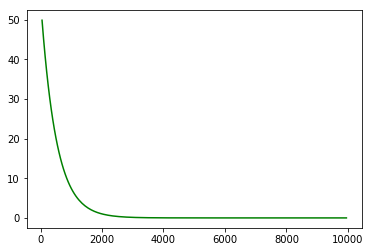

In [309]:
plt.plot(iters, loss_curve, 'g-')